In [30]:
from src.doc2vec import Doc2VecSVM

In [31]:
doc2vecsvm = Doc2VecSVM(doc2vec_model="name1")
docmodel = doc2vecsvm.doc2vec_model

In [42]:
d = load_all_docs()

Loading files: 100%|██████████| 100000/100000 [00:02<00:00, 39335.20it/s]

*** LOADED DOCUMENTS FOR DOC2VEC ***


In [43]:
import numpy as np

['A',
 'funny',
 'thing',
 'happened',
 'to',
 'me',
 'while',
 'watching',
 '"Mosquito":',
 'on',
 'the',
 'one',
 'hand,',
 'the',
 'hero',
 'is',
 'a',
 'deaf-mute',
 'and',
 'the',
 'director',
 'is',
 'totally',
 'unable',
 'to',
 'make',
 'us',
 'understand',
 'why',
 'he',
 'does',
 'what',
 'he',
 'does',
 '(mutilating',
 'mannequins...er,',
 'excuse',
 'me,',
 'corpses)',
 'through',
 'his',
 'images.',
 'On',
 'the',
 'other',
 'hand,',
 'the',
 'English',
 'version',
 'at',
 'least',
 'is',
 'very',
 'badly',
 'dubbed.',
 'So',
 'I',
 'found',
 'myself',
 'wishing',
 'there',
 'had',
 'been',
 'both',
 'more',
 'AND',
 'less',
 'dialogue',
 'at',
 'the',
 'same',
 'time!',
 'This',
 'film',
 'is',
 'stupid',
 '(funny',
 'how',
 'this',
 'guy',
 'has',
 'access',
 'to',
 'every',
 'graveyard',
 'and',
 'mortuary',
 'in',
 'his',
 'town)',
 'and',
 'lurid',
 '(where',
 'would',
 'we',
 'be',
 'in',
 'a',
 '70s',
 'exploitationer',
 'without',
 'our',
 'gratuitous',
 'lesbian',

In [142]:
t = []
doc = d[8]
for w in doc:
    if w in wv.vocab:
        ww = docmodel.wv.get_vector(w)
        t.append(ww)
X = np.array(t)

In [143]:
np.array(X).shape

(123, 300)

In [259]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [147]:
X_embedded = TSNE(n_components=2, perplexity=6).fit_transform(X)

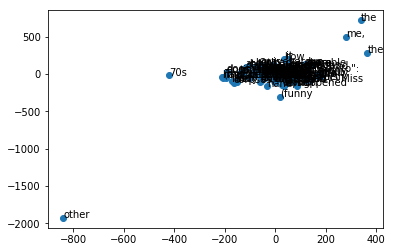

In [148]:
x = X_embedded[:,0]
y = X_embedded[:,1]
fig, ax = plt.subplots()
ax.scatter(x,y)
for i,txt in enumerate(d[5]):
    ax.annotate(txt, (x[i], y[i]))

In [151]:
u = ["dazzling,brilliant,phenomenal,excellent,fantastic","suck,terrible,awful,unwatchable,hideous","gripping,mesmerizing,riveting,spectacular,cool,awesome,thrilling,badass,excellent,moving,exciting","bad,cliched, sucks,boring,stupid,slow"]

In [155]:
a = u[0].split(",")+u[2].split(",")

In [156]:
b = u[1].split(",")+u[3].split(",")

In [157]:
a

['dazzling',
 'brilliant',
 'phenomenal',
 'excellent',
 'fantastic',
 'gripping',
 'mesmerizing',
 'riveting',
 'spectacular',
 'cool',
 'awesome',
 'thrilling',
 'badass',
 'excellent',
 'moving',
 'exciting']

In [158]:
b

['suck',
 'terrible',
 'awful',
 'unwatchable',
 'hideous',
 'bad',
 'cliched',
 ' sucks',
 'boring',
 'stupid',
 'slow']

In [159]:
c = a+b

In [297]:
def tsne_words_wv(wordlist):
    t = []
    wordlist = [word for word in wordlist if word in wv.vocab]
    for w in wordlist:
        ww = docmodel.wv.get_vector(w)
        t.append(ww)
    X = np.array(t)
    
    tsne_plot(X,wordlist)

def tsne_words_docv(wordlist):
    t = []
    for w in wordlist:
        ww = docmodel.infer_vector([w])
        t.append(ww)
    X = np.array(t)
    tsne_plot(X,wordlist)
    

def tsne_plot(X, labels, **kwargs):
    X_embedded = TSNE(n_components=2, perplexity=6).fit_transform(X)
    x = X_embedded[:,0]
    y = X_embedded[:,1]
    fig, ax = plt.subplots()
    ax.scatter(x,y)
#     for i,txt in enumerate(labels):
#         ax.annotate(txt, (x[i], y[i]))
    texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i,txt in enumerate(labels)]
    adjust_text(texts)

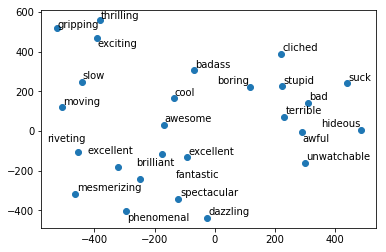

In [298]:
tsne_words_wv(c)

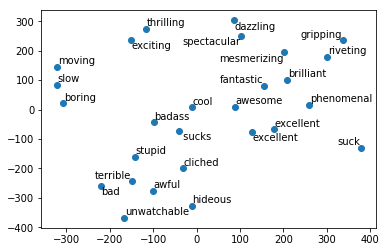

In [299]:
tsne_words_docv(c)

In [292]:
wordlist = d[1]
t = []
wordlist = [word for word in wordlist if word in wv.vocab]#
for w in wordlist:
    ww = docmodel.wv.get_vector(w)
    t.append(ww)
X = np.array(t)
X = np.array(list(X) + [docmodel.docvecs[1]])
wordlist = wordlist+["DOC_VECTOR"]

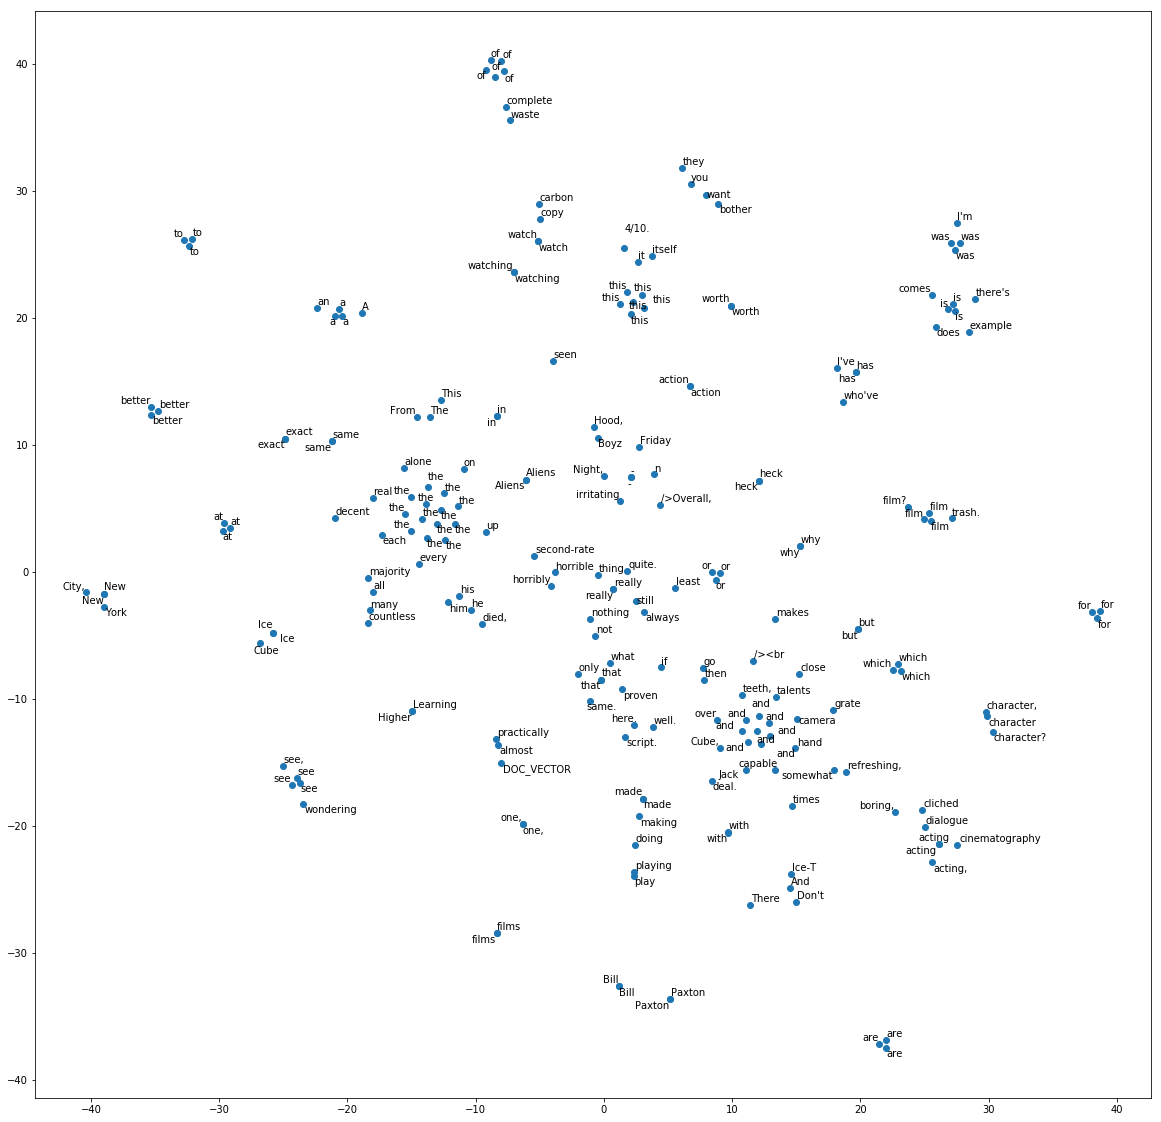

In [293]:
tsne_plot(X, wordlist,perplexity=3)

In [300]:
from nltk import pos_tag

In [305]:
pos_tag(d[0])

[('Once', 'RB'),
 ('again', 'RB'),
 ('Mr.', 'NNP'),
 ('Costner', 'NNP'),
 ('has', 'VBZ'),
 ('dragged', 'VBN'),
 ('out', 'RP'),
 ('a', 'DT'),
 ('movie', 'NN'),
 ('for', 'IN'),
 ('far', 'RB'),
 ('longer', 'JJR'),
 ('than', 'IN'),
 ('necessary.', 'JJ'),
 ('Aside', 'NNP'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('terrific', 'JJ'),
 ('sea', 'NN'),
 ('rescue', 'NN'),
 ('sequences,', 'NN'),
 ('of', 'IN'),
 ('which', 'WDT'),
 ('there', 'EX'),
 ('are', 'VBP'),
 ('very', 'RB'),
 ('few', 'JJ'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('did', 'VBD'),
 ('not', 'RB'),
 ('care', 'VB'),
 ('about', 'IN'),
 ('any', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('characters.', 'NN'),
 ('Most', 'JJS'),
 ('of', 'IN'),
 ('us', 'PRP'),
 ('have', 'VBP'),
 ('ghosts', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('closet,', 'NN'),
 ('and', 'CC'),
 ("Costner's", 'NNP'),
 ('character', 'NN'),
 ('are', 'VBP'),
 ('realized', 'VBN'),
 ('early', 'JJ'),
 ('on,', 'NN'),
 ('and', 'CC'),
 ('then', 'RB'),
 ('forgotten', 'VB'),
 ('until', 'IN'),


In [311]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [310]:
type(_)

bool